In [21]:
import geopandas as gpd

import matplotlib.pyplot as plt

import networkx as nx

import osmnx as ox

import contextily as ctx

In [22]:
gdf = gpd.read_file('Data/Census_Data/carownership.geojson')

In [23]:
gdf.head()

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
0,05000US06037,"Los Angeles County, CA",4811408.0,9061.0,4016706.0,10739.0,3560471.0,10203.0,456235.0,6351.0,...,718.0,37430.0,1348.0,129662.0,2899.0,55040.0,1761.0,268685.0,4613.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,26.0,36.0,82.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,10.0,16.0,0.0,12.0,77.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,74.0,65.0,72.0,63.0,129.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,...,12.0,0.0,12.0,8.0,13.0,30.0,42.0,68.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [27]:
columns_to_keep = ['geoid',
 'name',
 'B08301001',
 'B08301002',
 'geometry']


In [28]:
gdf = gdf[columns_to_keep]


In [29]:
gdf.head()

,geoid,name,B08301001,B08301002,geometry
0,05000US06037,"Los Angeles County, CA",4811408.0,4016706.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [30]:
gdf.columns = ['geoid',
 'name',
 'Total',
 'Automobile',
 'geometry']

In [31]:
gdf.head()

,geoid,name,Total,Automobile,geometry
0,05000US06037,"Los Angeles County, CA",4811408.0,4016706.0,"MULTIPOLYGON (((-118.70339 34.16859, -118.7033..."
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [32]:
gdf = gdf.drop([0])

In [33]:
gdf.head()

,geoid,name,Total,Automobile,geometry
1,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,1860.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
2,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,1730.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
3,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,2699.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
4,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,1439.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."
5,14000US06037101300,"Census Tract 1013, Los Angeles, CA",1782.0,1538.0,"MULTIPOLYGON (((-118.27822 34.25068, -118.2782..."


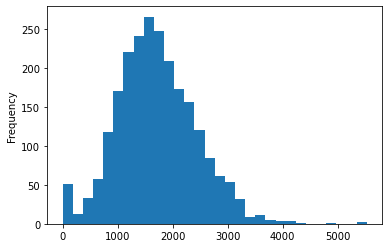

In [34]:
gdf['Automobile'].plot.hist(bins=30)

In [35]:
gdf['Percent Automobile'] = gdf['Automobile']/gdf['Total']*100

In [36]:
gdf.sample(5)

,geoid,name,Total,Automobile,geometry,Percent Automobile
1844,14000US06037571200,"Census Tract 5712, Los Angeles, CA",4217.0,3740.0,"MULTIPOLYGON (((-118.14247 33.83481, -118.1424...",88.688641
1773,14000US06037553701,"Census Tract 5537.01, Los Angeles, CA",1734.0,1613.0,"MULTIPOLYGON (((-118.18779 33.90361, -118.1876...",93.021915
2271,14000US06037920033,"Census Tract 9200.33, Los Angeles, CA",292.0,233.0,"MULTIPOLYGON (((-118.44536 34.45159, -118.4430...",79.794521
291,14000US06037134800,"Census Tract 1348, Los Angeles, CA",3297.0,3076.0,"MULTIPOLYGON (((-118.58290 34.19859, -118.5829...",93.296937
1515,14000US06037503801,"Census Tract 5038.01, Los Angeles, CA",1941.0,1782.0,"MULTIPOLYGON (((-118.00195 33.89099, -118.0014...",91.808346


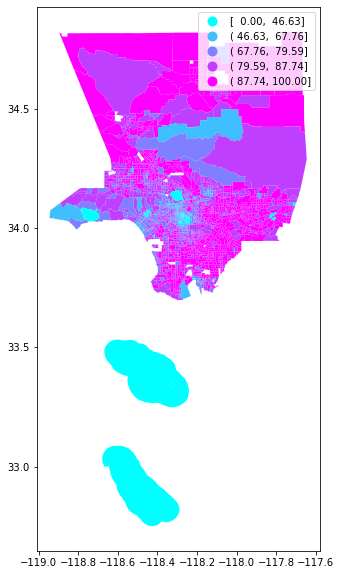

In [38]:
gdf.plot(figsize=(12,10),
                 column='Percent Automobile',
                 legend=True, 
                 cmap='cool',
                 scheme='NaturalBreaks')

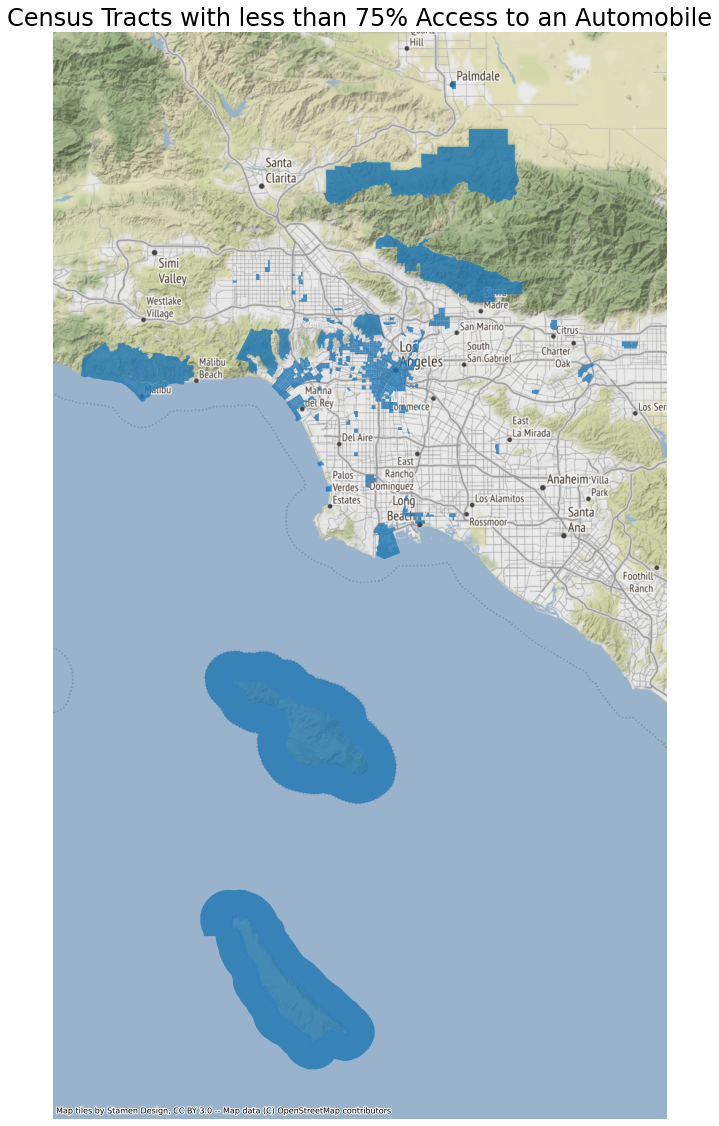

In [40]:
gdf_web_mercator = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(20, 20))
gdf_web_mercator[gdf_web_mercator['Percent Automobile'] < 75].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts with less than 75% Access to an Automobile',fontsize=24)
ctx.add_basemap(ax)

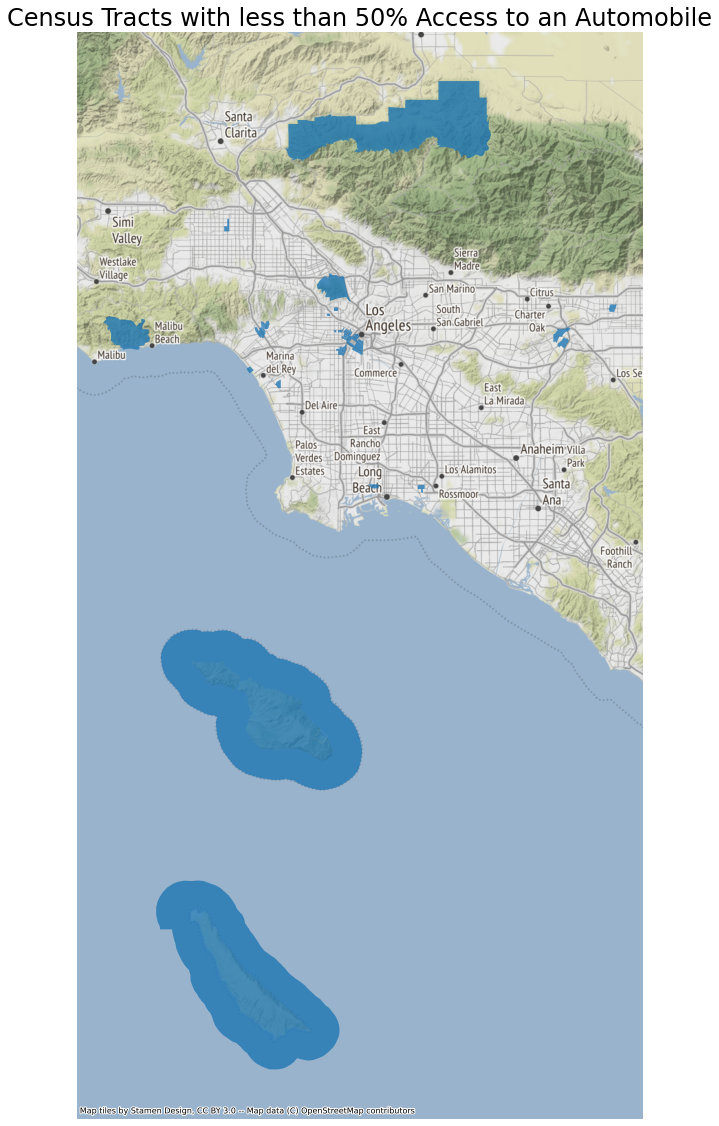

In [41]:
gdf_web_mercator = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(20, 20))
gdf_web_mercator[gdf_web_mercator['Percent Automobile'] < 50].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts with less than 50% Access to an Automobile',fontsize=24)
ctx.add_basemap(ax)

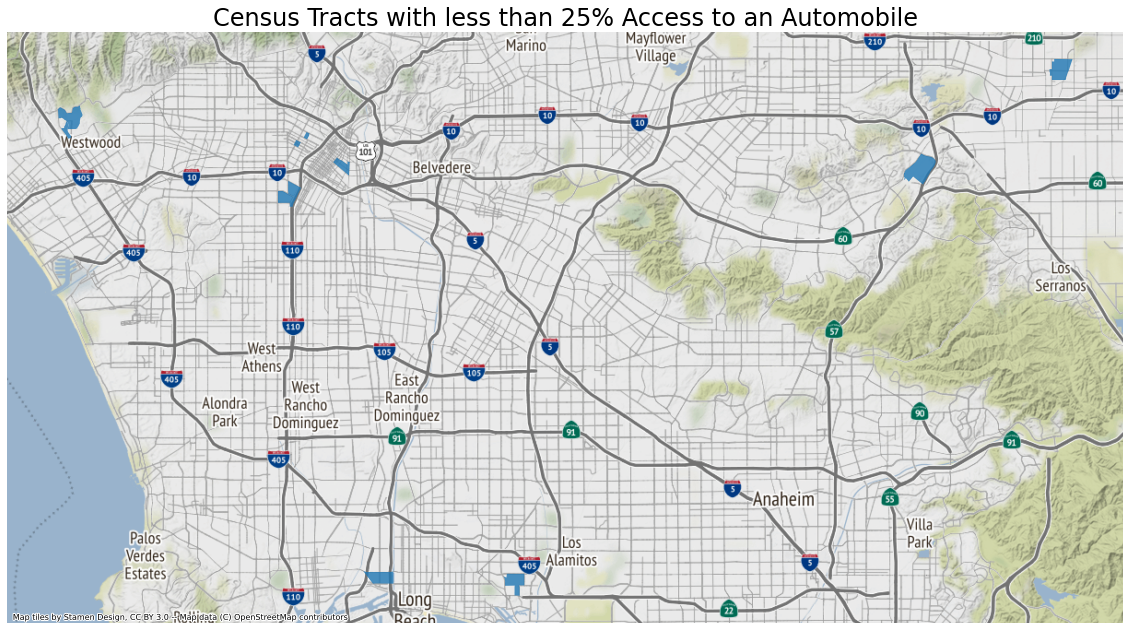

In [42]:
gdf_web_mercator = gdf.to_crs(epsg=3857)
fig, ax = plt.subplots(figsize=(20, 20))
gdf_web_mercator[gdf_web_mercator['Percent Automobile'] < 25].plot(ax=ax, alpha=0.8)
ax.axis('off')
ax.set_title('Census Tracts with less than 25% Access to an Automobile',fontsize=24)
ctx.add_basemap(ax)